# ETT size

## BorutaShap

In [1]:
import xgboost as xgb
import numpy as np
import random, os, datetime, pickle
import pandas as pd

dat = np.load(f'dataset/ETT_size-outliers3.npz')
x, y = dat['x'], dat['y']
y_old  = dat['y_old']

# training set의 뒤쪽 20%를 test set 으로 사용
nsamp = len(y)
ntest = int(nsamp * 0.2)
ntrain = nsamp - ntest
x_test = x[-ntest:, :]
y_test = y[-ntest:]
y_test_old = y_old[-ntest:]
x_train = x[:ntrain, :]
y_train = y[:ntrain]

print(f'x_train: {(x_train).shape}, x_test: {x_test.shape}')

x_train: (24764, 5), x_test: (6190, 5)


In [2]:
INPUT_VARS = ['age','sex','weight','height', 'cuffed']
TARGET_VAR = 'airway_tube_size'

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer().fit(x_train)
x_train_imputed = imp.transform(x_train)
x_test_imputed = imp.transform(x_test)


X = pd.DataFrame(x_train_imputed, columns=INPUT_VARS)
#Y = pd.DataFrame(y, columns=[TARGET_VAR])

100%|██████████| 100/100 [03:01<00:00,  1.82s/it]


4 attributes confirmed important: ['height', 'age', 'cuffed', 'weight']
1 attributes confirmed unimportant: ['sex']
0 tentative attributes remains: []


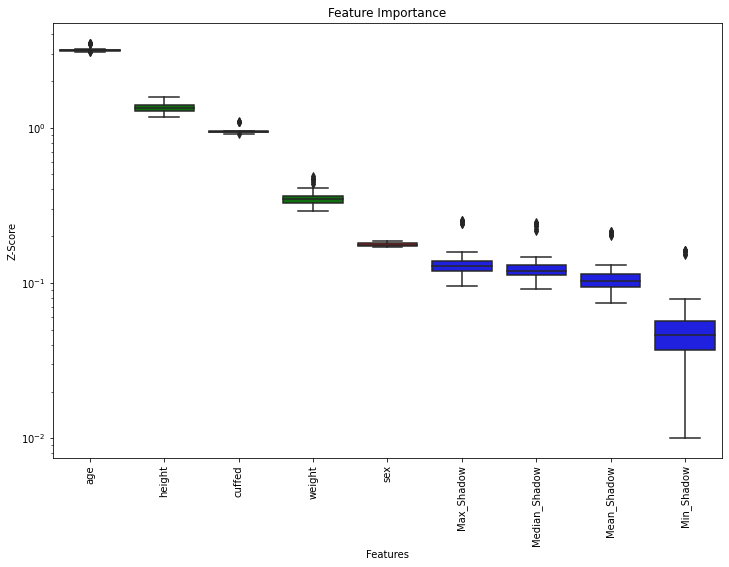

In [20]:
# feature selection using BorutaShap
from BorutaShap import BorutaShap

# xgbr에 한번 fitting한 모델 이용
xgbr = xgb.XGBRegressor()
xgbr.load_model('result/outliers+w+h/size/acc1-0.621_acc3-0.982_XGBR_5inputs_10fold/model.model')

SEED = 98
Feature_Selector = BorutaShap(model=xgbr, 
                              importance_measure='shap', 
                              classification=False, 
                              percentile=100, 
                              pvalue=0.05)

Feature_Selector.fit(X=X, 
                     y=y_train, 
                     n_trials=100, 
                     sample=False, 
                     train_or_test = 'train', 
                     normalize=True, 
                     verbose=True, 
                     random_state=SEED)


# boruta plot
Feature_Selector.plot(X_size=10,
                       which_features='all', figsize=(12,8))

/home/painstudy/anaconda3/envs/numbaenv/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [03:01<00:00,  1.81s/it]


4 attributes confirmed important: ['cuffed', 'height', 'age', 'weight']
1 attributes confirmed unimportant: ['sex']
0 tentative attributes remains: []


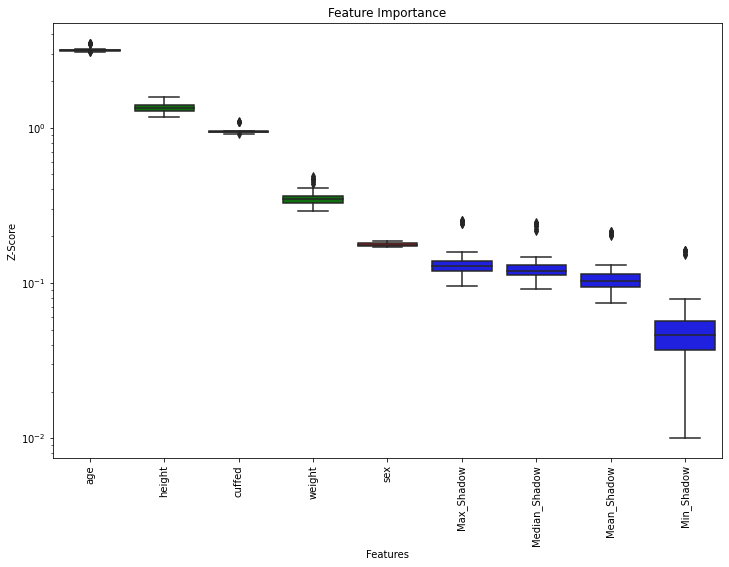

In [3]:
# feature selection using BorutaShap
from BorutaShap import BorutaShap

SEED = 98
xgbr = xgb.XGBRegressor()

Feature_Selector = BorutaShap(model=xgbr, 
                              importance_measure='shap', 
                              classification=False, 
                              percentile=100, 
                              pvalue=0.05)

Feature_Selector.fit(X=X, 
                     y=y_train, 
                     n_trials=100, 
                     sample=False, 
                     train_or_test = 'train', 
                     normalize=True, 
                     verbose=True, 
                     random_state=SEED)

# boruta plot
Feature_Selector.plot(X_size=10,
                       which_features='all')

/home/painstudy/anaconda3/envs/numbaenv/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [03:15<00:00,  1.95s/it]


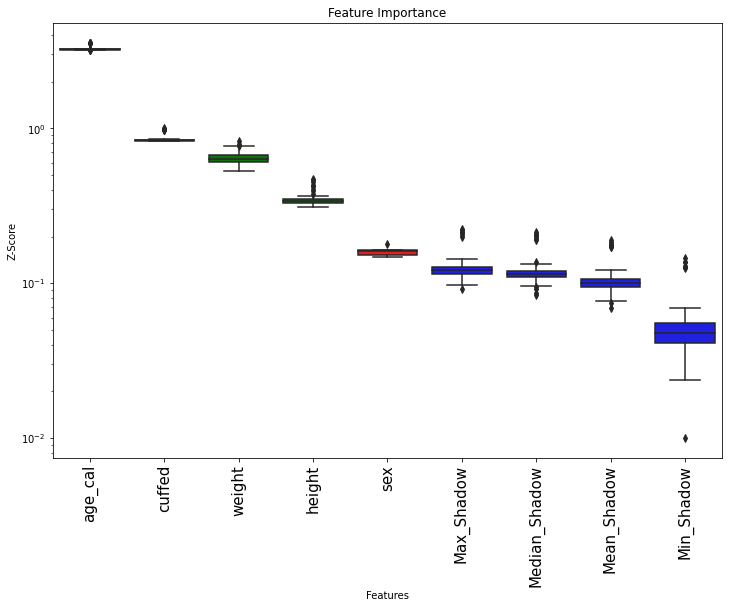

In [5]:
# feature selection using BorutaShap
from BorutaShap import BorutaShap

SEED = 98
xgbr = xgb.XGBRegressor()

Feature_Selector = BorutaShap(model=xgbr, 
                              importance_measure='shap', 
                              classification=False, 
                              percentile=100, 
                              pvalue=0.05)

Feature_Selector.fit(X=X, 
                     y=y_train, 
                     n_trials=100, 
                     sample=False, 
                     train_or_test = 'train', 
                     normalize=True, 
                     verbose=True, 
                     random_state=SEED)

# boruta plot
Feature_Selector.plot(X_size=15,
                       which_features='all')

## SHAP
* [참조 블로그](https://zephyrus1111.tistory.com/423)

In [9]:
import shap
import xgboost as xgb
import numpy as np
import random, os, datetime, pickle
import pandas as pd


# xgbr에 내장된 함수 이용
xgbr = xgb.XGBRegressor()
#xgbr.load_model('result/outliers+w+h/size/acc1-0.621_acc3-0.982_XGBR_5inputs_10fold/model.model')
xgbr.load_model('result/outliers+w+h/size/acc1-0.622_acc3-0.981_XGBR_4inputs_10fold/model.model')

shap.initjs()
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(x_train)

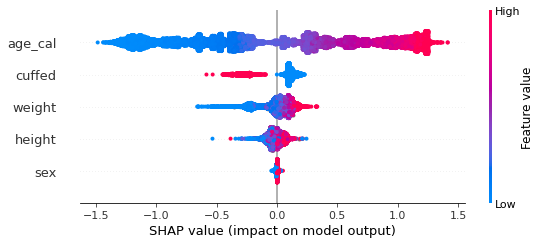

In [12]:
INPUT_VARS = ['age','sex','weight','height', 'cuffed']

X_train = pd.DataFrame(x_train, columns=INPUT_VARS)

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
shap.summary_plot(shap_values, X_train, show=False)
ax.set_xlabel('SHAP Value')
ax.set_title('SHAP Dot Plot', fontsize=20)
plt.show()

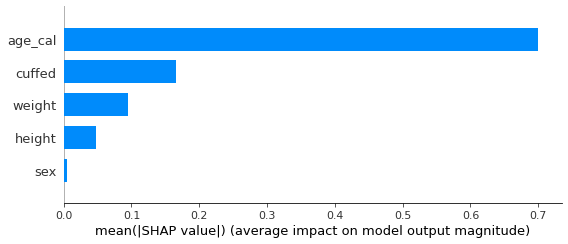

In [14]:
X_train = pd.DataFrame(x_train, columns=INPUT_VARS)
shap.summary_plot(shap_values, X_train, plot_type = 'bar')

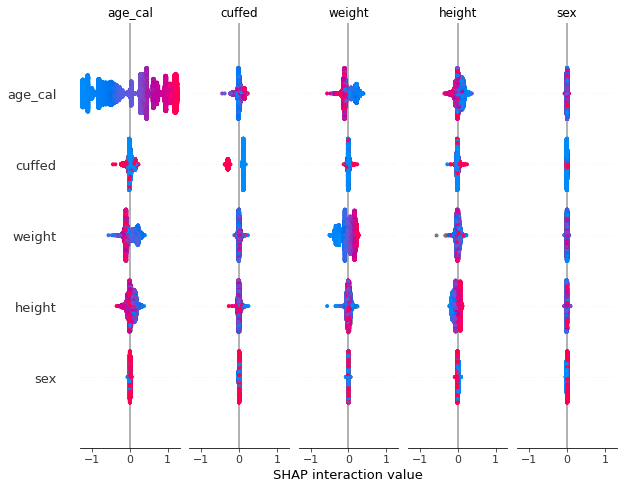

In [15]:
shap_interaction_values = explainer.shap_interaction_values(X_train)
shap.summary_plot(shap_interaction_values, X_train)

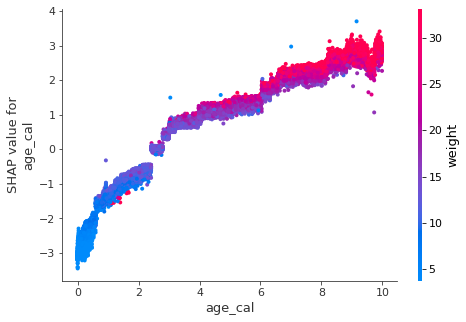

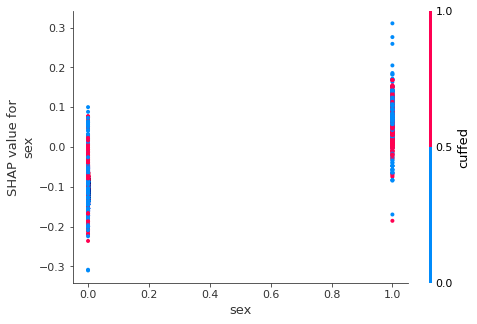

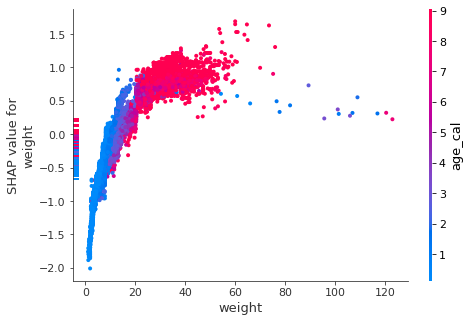

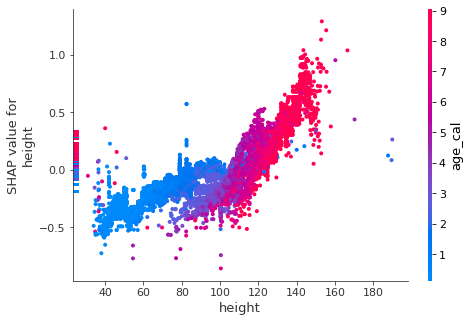

In [22]:
shap.dependence_plot(0, shap_values, X_train, interaction_index="auto")
shap.dependence_plot(1, shap_values, X_train, interaction_index="auto")
shap.dependence_plot(2, shap_values, X_train, interaction_index="auto")
shap.dependence_plot(3, shap_values, X_train, interaction_index="auto")

In [ ]:
shap.partial_dependence_plot(
    0, model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

In [ ]:
shap_interaction_values = explainer.shap_interaction_values(X_train)

shap.dependence_plot(
    ('RM', 'ETT size'),
    shap_interaction_values, X_train,
    display_features=X_train
)

# Depth - XGBoost

## BorutaShap

In [12]:
import xgboost as xgb
import numpy as np
import random, os, datetime, pickle
import pandas as pd

dat = np.load(f'dataset/ETT_depth-outliers.npz')
x, y = dat['x'], dat['y']
x = x[:,:5]
#y_old  = dat['y_old']

# training set의 뒤쪽 20%를 test set 으로 사용
nsamp = len(y)
ntest = int(nsamp * 0.2)
ntrain = nsamp - ntest 
x_test = x[-ntest:, :]
y_test = y[-ntest:]
#y_test_old = y_old[-ntest:]
x_train = x[:ntrain, :]
y_train = y[:ntrain]

print(f'x_train: {(x_train).shape}, x_test: {x_test.shape}')

x_train: (21344, 5), x_test: (5335, 5)


In [13]:
INPUT_VARS = ['age','sex','weight','height', 'cuffed']
TARGET_VAR = 'fixed'

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

x_train = x_train[:,0:5]
x_test = x_test[:,0:5]
imp = IterativeImputer().fit(x_train)
x_train_imputed = imp.transform(x_train)
x_test_imputed = imp.transform(x_test)

#x_train_imputed = x_train_imputed[:,0:5]
X = pd.DataFrame(x_train_imputed, columns=INPUT_VARS)
#Y = pd.DataFrame(y, columns=[TARGET_VAR])

In [16]:
# xgbr에 내장된 함수 이용
xgbr = xgb.XGBRegressor()
xgbr.load_model('result/depth_8cm/mae-0.843_mse-1.404_XGBR-5inputs_10fold/model.model')

100%|██████████| 100/100 [02:41<00:00,  1.61s/it]


4 attributes confirmed important: ['height', 'sex', 'age', 'weight']
1 attributes confirmed unimportant: ['cuffed']
0 tentative attributes remains: []


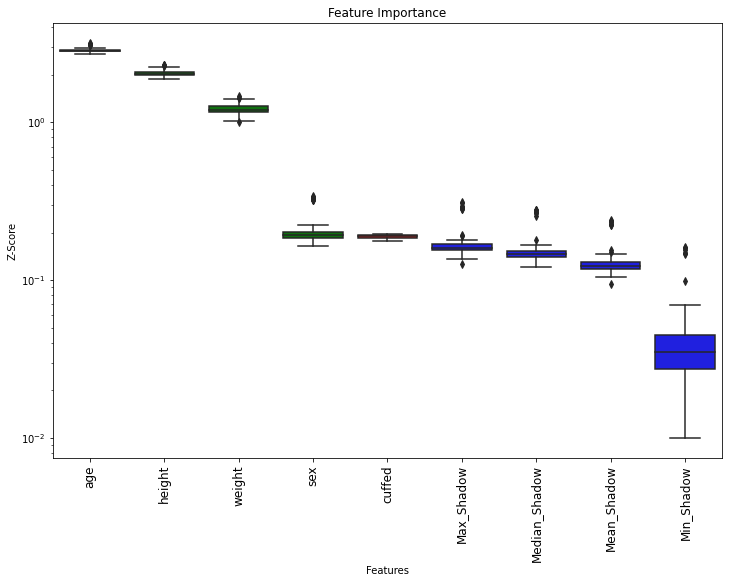

In [15]:
# feature selection using BorutaShap
from BorutaShap import BorutaShap

SEED = 98
Feature_Selector = BorutaShap(model=xgb.XGBRegressor(), 
                              importance_measure='shap', 
                              classification=False, 
                              percentile=100, 
                              pvalue=0.05)

Feature_Selector.fit(X=X, 
                     y=y_train, 
                     n_trials=100, 
                     sample=False, 
                     train_or_test = 'train', 
                     normalize=True, 
                     verbose=True, 
                     random_state=SEED)


Feature_Selector.plot(X_size=12,
                       which_features='all')

In [4]:
# feature selection using BorutaShap
from BorutaShap import BorutaShap

SEED = 98
Feature_Selector = BorutaShap(model=xgb.XGBRegressor(), 
                              importance_measure='shap', 
                              classification=False, 
                              percentile=100, 
                              pvalue=0.05)

Feature_Selector.fit(X=X, 
                     y=y_train, 
                     n_trials=100, 
                     sample=False, 
                     train_or_test = 'test', 
                     normalize=True, 
                     verbose=True, 
                     random_state=SEED)

100%|██████████| 100/100 [02:42<00:00,  1.62s/it]

4 attributes confirmed important: ['age_cal', 'height', 'sex', 'weight']
1 attributes confirmed unimportant: ['cuffed']
0 tentative attributes remains: []


## SHAP

/home/painstudy/anaconda3/envs/numbaenv/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


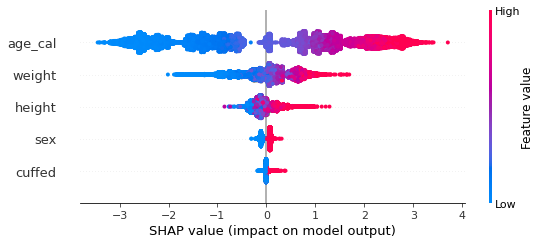

In [5]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(x_train)

X_train = pd.DataFrame(x_train, columns=INPUT_VARS)
shap.summary_plot(shap_values, X_train)#, plot_type='violin')

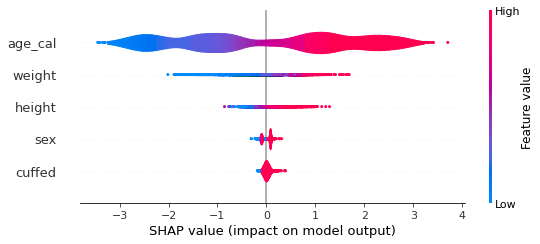

In [7]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(x_train)

X_train = pd.DataFrame(x_train, columns=INPUT_VARS)
shap.summary_plot(shap_values, X_train, plot_type='violin')

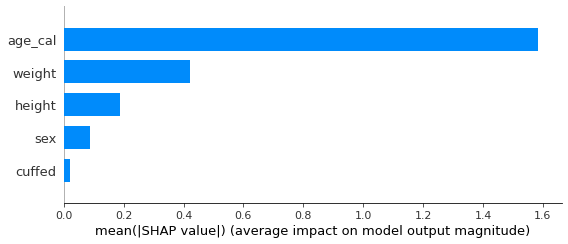

In [6]:
shap.summary_plot(shap_values, X_train, plot_type = 'bar')

In [12]:
shap.plots.scatter(shap_values[:,0])

AssertionError: The shap_values paramemter must be a shap.Explanation object!

In [13]:
shap.plots.waterfall(shap_values[1])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [ ]:
# feature selection using BorutaShap
from BorutaShap import BorutaShap

SEED = 98
Feature_Selector = BorutaShap(
                              importance_measure='shap', 
                              classification=False, 
                              percentile=100, 
                              pvalue=0.05)

Feature_Selector.fit(X=X, 
                     y=y_train, 
                     n_trials=100, 
                     sample=False, 
                     train_or_test = 'train', 
                     normalize=True, 
                     verbose=False, 
                     random_state=SEED)

# boruta plot
Feature_Selector.plot(X_size=15,
                       which_features='all')

  2%|▏         | 2/100 [3:18:27<161:53:11, 5946.85s/it]